In [1]:
from matplotlib.pylab import *
from jax import lax, random, numpy as jnp
from flax import linen as nn
from matplotlib.pylab import *
from jax import lax, random, numpy as jnp
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import ml_collections
import einops

import optax
from flax.training import train_state  # Useful dataclass to keep train state

import h5py
import jax

In [2]:
import imageio.v3 as iio

im = iio.imread('imageio:chelsea.png')
im.shape

(300, 451, 3)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


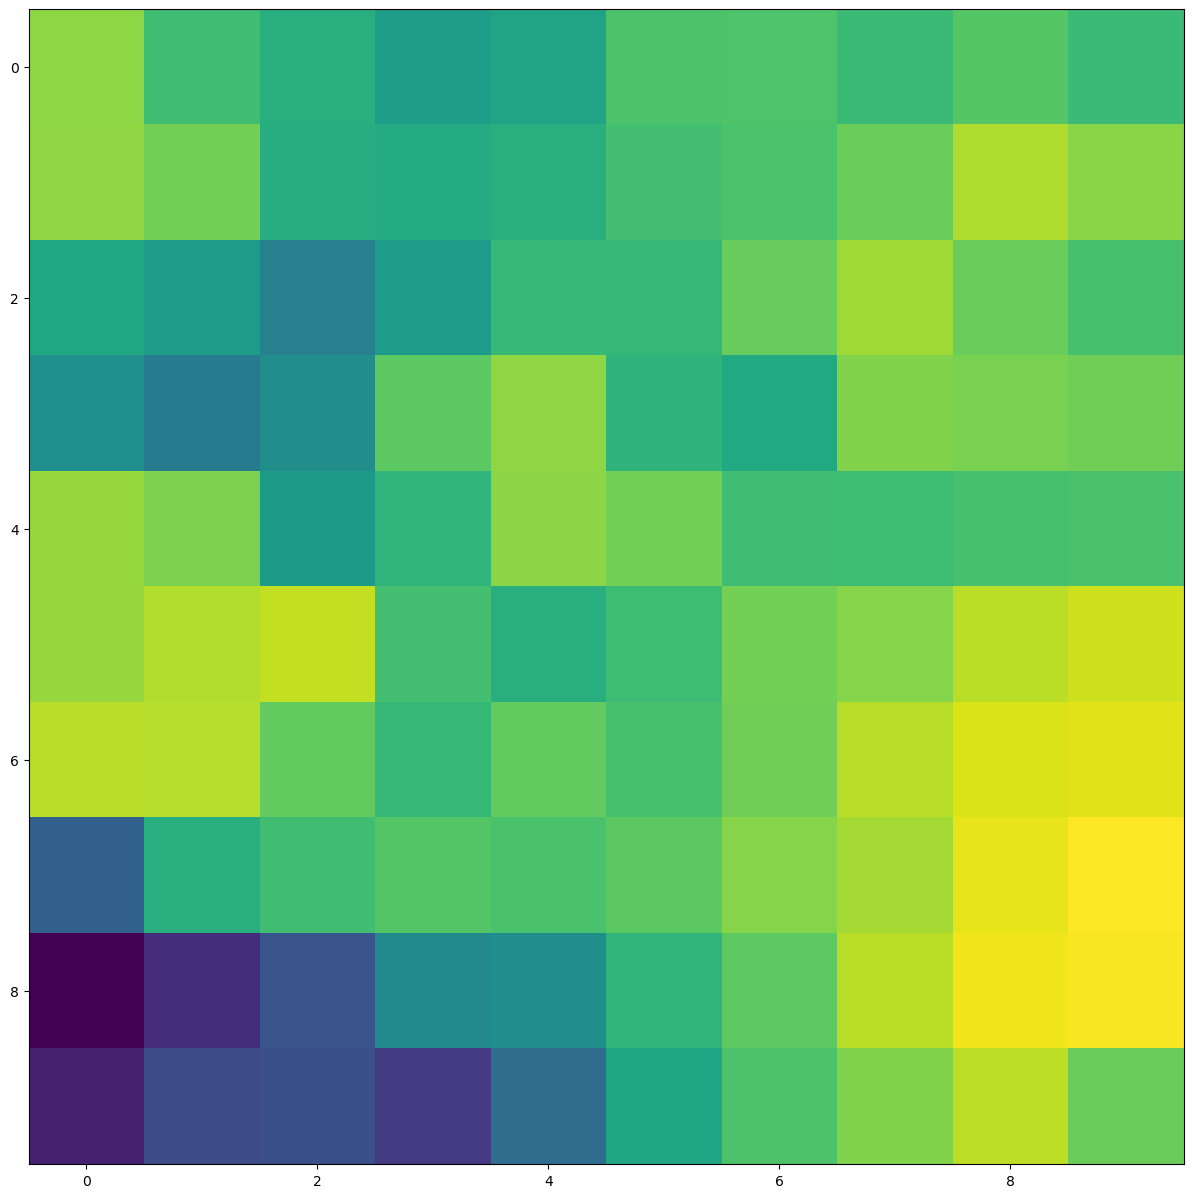

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import jax
im = iio.imread('imageio:chelsea.png')

plt.figure(figsize=(15, 15))
# plt.set_cmap("gray")
im=jnp.round(jax.image.resize(im, (100,100,3), "linear")).astype(int)
im = jnp.mean(im,axis=-1)
plt.imshow(im[20:30,20:30])
plt.show()

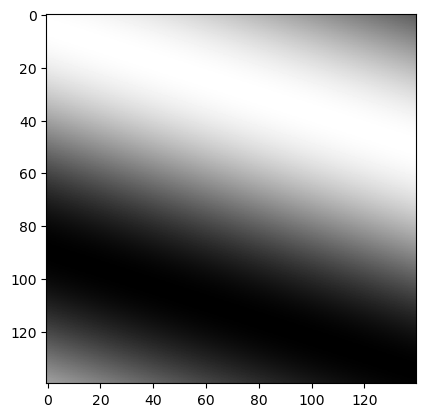

In [4]:
import numpy as np
import matplotlib.pyplot as plt



x = jnp.arange(-70, 70, 1)
X, Y = jnp.meshgrid(x, x)
wavelength = 50
alpha = jnp.pi*1.6
beta = jnp.pi*1.6
shift_x=0
shift_y=0
grating = jnp.sin(
    2*jnp.pi*(X*jnp.cos(alpha+shift_x)*jnp.cos(beta+shift_x) + Y*jnp.sin(alpha+shift_y)*jnp.cos(beta+shift_y)) / wavelength
)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

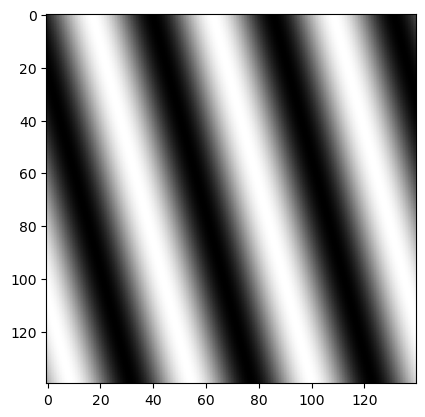

In [5]:
import numpy as np
import matplotlib.pyplot as plt



x = jnp.arange(-70, 70, 1)
X, Y = jnp.meshgrid(x, x)
wavelength = 50
alpha = jnp.pi*1.6
beta = jnp.pi*1.6
shift_x=1
shift_y=0
grating = jnp.sin(
    2*jnp.pi*(X*(jnp.cos(alpha)*jnp.cos(beta)+shift_x) + Y*(jnp.sin(alpha)*jnp.cos(beta) +shift_y)) / wavelength
)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()
# print(X[0,:])
# print(Y[:,0])
# Y.shape

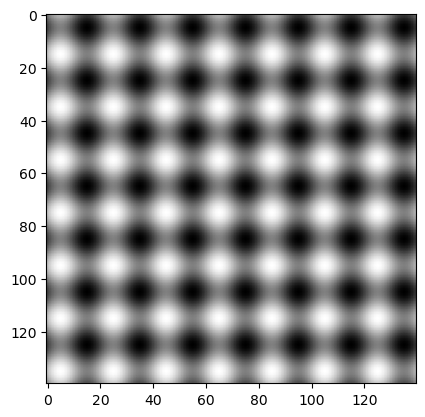

In [6]:
def get_3d_grating_to_scan(wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):
        alpha = jnp.pi*alphaa
        beta = jnp.pi*betaa
        x_mul = jnp.cos(alpha)*jnp.cos(beta)
        y_mul= jnp.sin(alpha)*jnp.cos(beta)
        z_mul = jnp.sin(beta)
        grating = (jnp.sin(
                2*jnp.pi*(((X*x_mul)+shift_x) + ((Y*y_mul)+shift_y) +((Z*z_mul) +shift_z))/ wavelength
                        )*amplitude)+shift_amplitude
        return grating


x = jnp.arange(-70, 70, 1)
X, Y,Z = jnp.meshgrid(x, x,x)
wavelength = 20
amplitude=1
shift_x=20
shift_y=20
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.5
grating_a=get_3d_grating_to_scan(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

wavelength = 20
amplitude=1
shift_x=0
shift_y=0
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.0
grating_b=get_3d_grating_to_scan(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

# [0] wavelength, [1] alphaa, [2 ]betaa, [3] amplitude, [4] shift_x, [5] shift_y, [6] shift_z, [7] shift_amplitude       
# [ [20.0,1.0,1.5,1.0,0.0,0.0,0.0, 0.0] 
# ,[20.0,1.0,1.0,1.0,0.0,0.0,0.0, 0.0] ]

plt.set_cmap("gray")
plt.imshow(np.array(grating_a)[1,:,:]+grating_b[1,:,:])
plt.show()

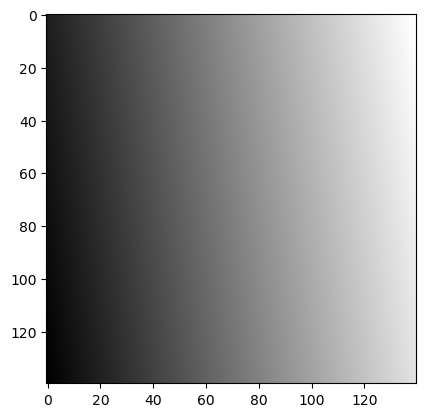

In [7]:
def get_3d_grating_vals(wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):
        alpha = jnp.pi*alphaa
        beta = jnp.pi*betaa
        x_mul = jnp.cos(alpha)*jnp.cos(beta)
        y_mul= jnp.sin(alpha)*jnp.cos(beta)
        z_mul = jnp.sin(beta)
      
        return x_mul, y_mul, z_mul

def get_3d_grating(wavelength, x_mul_a,x_mul_b, y_mul_a,y_mul_b, z_mul_a,z_mul_b ,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):

        grating = (jnp.sin(
                2*jnp.pi*(  ((X*x_mul_a)+shift_x)*x_mul_b+shift_x
                          + ((Y*y_mul_a)+shift_y)*y_mul_b+shift_y
                           +((Z*z_mul_a) +shift_z)*z_mul_b+shift_z
                           )/ wavelength
                        )*amplitude)+shift_amplitude
        return grating


x = jnp.arange(-70, 70, 1)
X, Y,Z = jnp.meshgrid(x, x,x)
wavelength = 20
amplitude=1
shift_x=0
shift_y=0
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.5
x_mul_a, y_mul_a, z_mul_a =get_3d_grating_vals(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

wavelength = 20
amplitude=1
shift_x=0
shift_y=0
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.0
x_mul_b, y_mul_b, z_mul_b=get_3d_grating_vals(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

x_mul_a, y_mul_a, z_mul_a



grating=get_3d_grating(wavelength, x_mul_a,x_mul_b, y_mul_a,y_mul_b, z_mul_a,z_mul_b,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)
plt.set_cmap("gray")
plt.imshow(np.array(grating)[1,:,:])
plt.show()

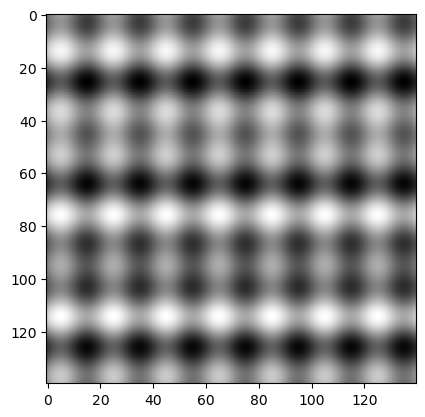

In [8]:
def get_3d_grating_to_scan(carried,parameters_per_wave ):
        """
        creating 3d wave sinusoidal grating of given properties
        X,Y,Z are taken from the meshgrid
        """
        wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude=parameters_per_wave
        X,Y,Z,wavelength_old,grating_old =carried
        wavelength_new=wavelength+wavelength_old
        alpha = jnp.pi*alphaa
        beta = jnp.pi*betaa
        grating = (jnp.sin(
        2*jnp.pi*(((X*jnp.cos(alpha)*jnp.cos(beta))+shift_x) + (Y*jnp.sin(alpha)*jnp.cos(beta)+shift_y) +(Z*jnp.sin(beta)) +shift_z)/ wavelength_new
          )*amplitude)+shift_amplitude
        grating_new=grating+grating_old
        curried_new=  X,Y,Z,wavelength_new,grating_new
        return  curried_new,None

# [0] wavelength, [1] alphaa, [2 ]betaa, [3] amplitude, [4] shift_x, [5] shift_y, [6] shift_z, [7] shift_amplitude       
parameters_per_wave=jnp.array([ [20.0,1.0,1.5,1.0,0.0,0.0,0.0, 0.0] 
,[0.0,1.0,1.0,1.0,0.0,0.0,0.0, 0.0] 
,[0.0,0.3,1.0,1.0,2.0,12.0,0.0, 0.0] ]

)

x = jnp.arange(-70, 70, 1)
X, Y,Z = jnp.meshgrid(x, x,x)

initt=(X,Y,Z,jnp.array([0.0]),jnp.zeros_like(X,dtype=float))
# wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude=parameters_per_wave
curried,_=lax.scan(get_3d_grating_to_scan, initt, parameters_per_wave)
X,Y,Z,wavelength_new,grating_new=curried

plt.set_cmap("gray")
plt.imshow(np.array(grating_new)[1,:,:])
plt.show()

In [9]:
def get_3d_grating_to_scan(carried,parameters_per_wave):
        """
        creating 3d wave sinusoidal grating of given properties
        X,Y,Z are taken from the meshgrid
        """
        #now we need to set proper possible ranges as not all parameters should be between 0 an 1
        # angles can as theay are in radians and becouse of grating symmetry 0.1 and 1.1 look the same
        #wavelength by experiment should be between 0.1 and 2* diameter_no_pad
        # as images are normalized amplitude and amplitude shift between 0 and 1 are ok
        # shifts should be no larger than diameter
        for_correct_range= jnp.array([diameter_no_pad*2,1.0,1.0,1.0,diameter_no_pad,diameter_no_pad,diameter_no_pad, 1.0])
        params_grating=jnp.multiply(params_grating,for_correct_range)

        wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude=parameters_per_wave
        X,Y,Z,wavelength_old,grating_old,diameter_no_pad =carried
        wavelength_new=wavelength+wavelength_old
        alpha = jnp.pi*alphaa
        beta = jnp.pi*betaa
        grating = (jnp.sin(
        2*jnp.pi*(((X*jnp.cos(alpha)*jnp.cos(beta))+shift_x) + 
                  (Y*jnp.sin(alpha)*jnp.cos(beta)+shift_y) +
                  (Z*jnp.sin(beta)) 
                        +shift_z)/ wavelength_new
          )*amplitude)+shift_amplitude
        grating_new=grating+grating_old
        curried_new=  X,Y,Z,wavelength_new,grating_new,diameter_no_pad
        return  curried_new,wavelength_new


class Sinusoidal_grating_3d(nn.Module):
        """
        getting sinusoidal gratings added to get a exture given parameters; and those significant used parameters
        parameters would be the directon of the grating - described by 2 angles; wavelength and amplitude
        In order to enforce the order of the frequencies/wavelength in each grating to be decreasing (it will make later comparison easier)
        we will not learn the frequencies themself, but the diffrences between each frequency - so the biggest frequency will be the cumulative sum
        of all

        my idea later of comparing diffrent descriptors would be to look at each grating pair - and first check how much angles 
        are simmilar than multiply it by wavelength in the end summ all of the vector weighted by amplitude (not perfect idea but some)
        shifts by design would not be taken into account when comparing
        """
        cfg: ml_collections.config_dict.config_dict.ConfigDict
        diameter_no_pad:int

        @nn.compact
        def __call__(self,image_part: jnp.ndarray ,mask: jnp.ndarray ) -> jnp.ndarray:
                #adding the discrete cosine transform to make learning easier
                image_part= jnp.stack(jax.scipy.fft.dctn(image_part),image_part)
                image_part= Conv_trio(self.cfg,channels=16)(image_part)
                image_part= Conv_trio(self.cfg,channels=16)(image_part)
                image_part= Conv_trio(self.cfg,channels=16)(image_part)

                params_grating=nn.Dense(features=self.cfg.num_waves*8)(image_part)
                params_grating=jnp.reshape(params_grating,(self.cfg.num_waves,8))
                # [0] wavelength, [1] alphaa, [2 ]betaa, [3] amplitude, [4] shift_x, [5] shift_y, [6] shift_z, [7] shift_amplitude
                # params_grating = nn.relu(self.param('params_grating',nn.initializers.lecun_normal(),(self.cfg.num_waves,8))) 
                params_grating =nn.sigmoid(params_grating)  #  sigmoid always between 0 and 1
 
                #creating required meshgrid
                half= int(np.round(np.floor(self.diameter_no_pad/2)))
                x = jnp.arange(-half, half)# we have 0 between so we take intentionally diameter no pad
                X, Y,Z = jnp.meshgrid(x, x,x)
                
                #initial variables for scan
                initt=(X,Y,Z,jnp.array([0.0]),jnp.zeros_like(X,dtype=float),float(self.diameter_no_pad))
                # wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude=parameters_per_wave
                curried,wavelength_news=lax.scan(get_3d_grating_to_scan, initt, parameters_per_wave)
                X,Y,Z,wavelength_new,grating_new=curried
                #get values between 0 and 1
                res= nn.sigmoid(grating_new)
                #apply mask so we will have the mask only in the area where we can find the supervoxel                
                res=jnp.multiply(res,mask)
                #choosing only the significant parameters we purposufully ignoring shifts
                return res,params_grating[:,0:3],wavelength_news


# v_Texture_sv=nn.vmap(Texture_sv
#                             ,in_axes=(0, 0,0)
#                             ,variable_axes={'params': None} #parametters are shared
#                             ,split_rngs={'params': True,'texture' :True}
#                             )

In [10]:
def compare_grating_data():
    """
    we want here to compare graing parameters
    intentionally we will ignore shifts 
    by construction the wavelengths are in increasing order
    we want to compare gratings that has approximately the same direction
    among them as similar would be deemed those that has similar wavelength
    amplitude will be used to perform weighted summation over all gratings
    as the gratings can be similar but be not in exactly th same spot in the gratings array we need also to compare around with the neighbours
    """

In [11]:

import numpy as np
# Set cross-entropy, a permutation invariant classification loss function https://arxiv.org/pdf/1812.01217.pdf


def set_cross_entropy(y_true, y_pred):
    """
    y_true - np.ndarray of shape (N, D), where N is the number of objects in a set
             and D is a dimensionality of a feature vector
    Does not support different set sizes
    """
    X = y_pred[:,None,:]
    Y = y_true[None,:,:]
    cross_entropy = np.mean(-Y*np.log(X) - (1 - Y)*np.log(1 - X), axis = 2)
    logsumexp = np.log(np.mean(np.exp(cross_entropy), axis = 0))
    return np.mean(logsumexp)

In [12]:
def get_most_dist_landmarks():
    """
    as we are encoding texture via sinusoidal gratings we need also to convay somehow information about shape
    the chosen approach is to get some landmarks in a fixed directions from the supervoxel centers
    the exact number of directions is the hyperparameter but it will be spread apart as much as possible 
    and directions will be constant for all and knowing the supervoxel center it will be easy to calculate the absolute positions
    still the positions will be saved in a relative terms in a given direction 
    """
    pass

In [13]:
def get_supervoxel_similarity():
    """ 
    In primary supervoxel merging we will take into account first how much textures are similar- by getting similarity metric between gratings
    secondly how big is the border between them - long common border gives higher probability that it is indeed the same structure

    texture similarity - 2 approaches to test are described above

    for common border we would need a big bigger windows than those used in texture learning (plus 1 at the beginign of the axis)
    we can calculate it using shifts so we get shifts in both directions in all 3 axes  each time we concatenate in last dimension shifted and non shifted 
    then we get a dot product or other vector similarity metric with first a vector where first id is concatenated with second and later the second with first
    by summing all we should have approximate border length, to additionally increase the probability of merging small supervoxels we could use not just border length 
    but border length relative to the supervoxel size - as small supervoxels will be basically only border

    the process of concatenating will be just by weighted by simmilarity applying the difrrences between supervoxel ids - so in case of pefect similarity - =1
    we will just perform the full subtraction of diffrence between supervvoxel ids  - and we will get the same supervoxel id for both - effectively merging them
    probably it would be most convinient to apply it sequentially 

    Also one should consider looking at the strength of the edge between supervoxels (big value in sobel ... ) reducing the chance of
    merging in case of strong edge

    One need to later take care of the fact that after such process big part of supervoxelids will no longer be present (at least it should not be)
    probably as sorting and trimming is hard to achieve in a differentiable manner, we would use learned encoding with appropriate loss functions - so 
    output should be the list of supervoxels plus a grid where after iterating through the supervoxels list and masking in a grid all that are not present in a supervoxel
    id list we should get very similar result as original supervoxel grid (after merging) just rounded - to reduce additionally rounding error - here we will get rounding just before loss
    so we can probably round quite hard or maybe even use non differentiable round 
    The procedure described above potentially could be repeated  However new richer texture representations should be obtained

    """
    pass

In [14]:
"""
as we have both meaningfull geometric as well as texture data we could design 
meaningfull aggregations in the gnn or graph transformer

"""

'\nas we have both meaningfull geometric as well as texture data we could design \nmeaningfull aggregations in the gnn or graph transformer\n\n'

In [31]:
def add_layer_to_be_consistent(binArray):
    """
    we will here check weather in z direction we have consistent shapes -
        given a layer when there is True both above and below it should be True also in case of this layer
    binArray - analyzed boolean array
    """
    shapee=binArray.shape
    up=binArray[0:shapee[0]-2,:,:]
    # mid=binArray[1:shapee[0]-1,:,:]
    down=binArray[2:shapee[0],:,:]
    consistent_part=np.logical_and(up,down)
    consistent_part=np.pad(consistent_part,((1,1),(0,0),(0,0)))
    return np.logical_or(binArray,consistent_part)

aa=np.zeros((6,2,2),dtype=bool)
aa[2:5,:,:]=True
bb =aa.copy()
bb[3,:,:]=False
# bb=add_layer_to_be_consistent(bb)
print(np.array_equal(aa,bb))
# print(f"aa \n {aa}")
print(f"bb \n {bb}")

print(f"aa {aa.shape} bb {bb.shape} ")

False
bb 
 [[[False False]
  [False False]]

 [[False False]
  [False False]]

 [[ True  True]
  [ True  True]]

 [[False False]
  [False False]]

 [[ True  True]
  [ True  True]]

 [[False False]
  [False False]]]
aa (6, 2, 2) bb (6, 2, 2) 


In [8]:
a= np.ones(2*2*2*2)
proBs=a.reshape((2,2,2,2))
proPs=a.copy()

proPs[:,:,:,1]=4
proPs[:,:,:,0]=3

proBs[:,:,:,1]=1
proBs[:,:,:,0]=0

res= jnp.

array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]])